# Healthcare Analytics: Diabetes Prediction

## Overview
This notebook demonstrates a healthcare analytics project to predict diabetes using synthetic data modeled after the Pima Indians Diabetes dataset. 
We will explore the dataset, preprocess the data, train multiple machine learning models, and evaluate their performance.

In [65]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data_path = "C:/Users/radha/OneDrive/Documents/synthetic_diabetes_dataset.csv"
data = pd.read_csv(data_path)

# Display first few rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,172,57,32,182,48.680857,0.948872,42,0
1,3,102,76,28,72,36.731801,0.825950,31,1
2,12,193,64,20,298,47.503110,2.440896,22,0
3,14,106,87,10,40,41.629902,0.508277,64,0
4,10,88,40,33,80,34.140087,2.255771,32,1


In [73]:
# Summary statistics
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,6.875000,123.910156,69.675781,29.424479,157.250000,33.026999,1.282243,50.522135,0.533854
std,4.364429,44.076838,17.428276,11.316798,82.346582,9.935085,0.693581,16.972238,0.499178
min,0.000000,50.000000,40.000000,10.000000,15.000000,15.015497,0.100448,21.000000,0.000000
25%,3.000000,86.000000,54.000000,20.000000,82.000000,24.895833,0.691482,36.000000,0.000000
50%,7.000000,123.000000,70.000000,30.000000,157.500000,33.152760,1.281798,50.000000,1.000000
75%,11.000000,162.000000,85.000000,39.000000,228.000000,41.692374,1.903621,65.000000,1.000000
max,14.000000,199.000000,99.000000,49.000000,299.000000,49.984037,2.494295,79.000000,1.000000


In [75]:
# Check for missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

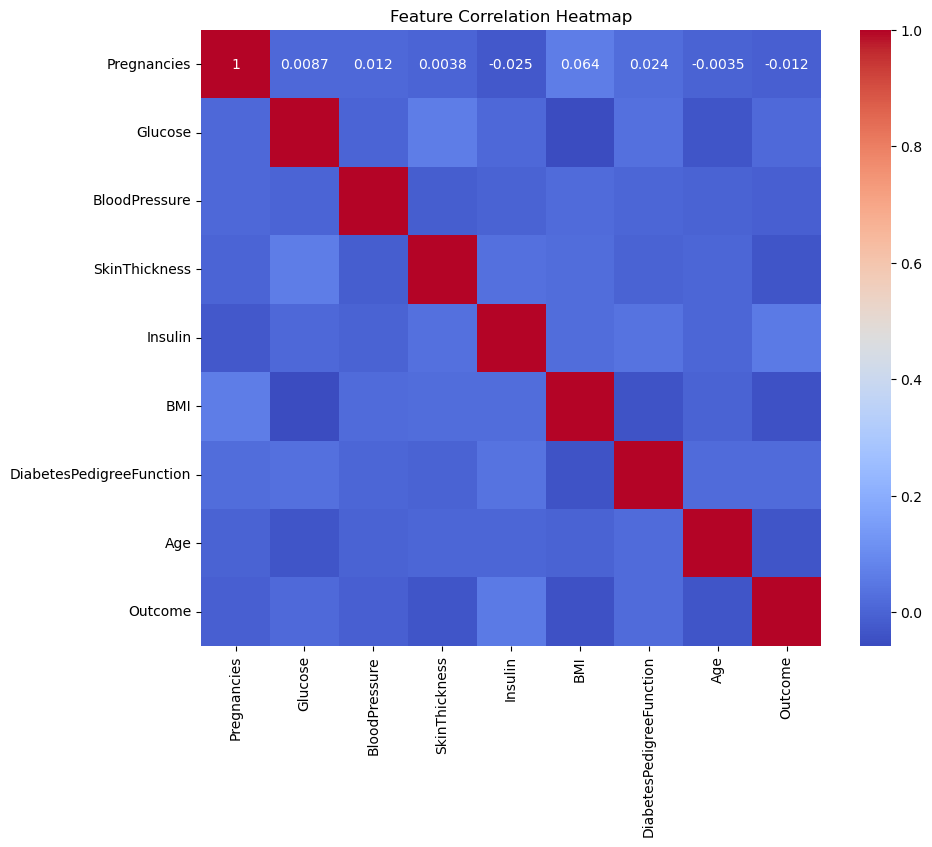

In [77]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [79]:
# Split the data into features and target
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
# Train Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_y_pred = lr_model.predict(X_test_scaled)

# Evaluate Logistic Regression
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")
print(classification_report(y_test, lr_y_pred))

Logistic Regression Accuracy: 0.49
              precision    recall  f1-score   support

           0       0.34      0.16      0.22        69
           1       0.52      0.75      0.62        85

    accuracy                           0.49       154
   macro avg       0.43      0.46      0.42       154
weighted avg       0.44      0.49      0.44       154



In [83]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_y_pred = rf_model.predict(X_test_scaled)

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(classification_report(y_test, rf_y_pred))

Random Forest Accuracy: 0.50
              precision    recall  f1-score   support

           0       0.45      0.49      0.47        69
           1       0.55      0.51      0.53        85

    accuracy                           0.50       154
   macro avg       0.50      0.50      0.50       154
weighted avg       0.50      0.50      0.50       154



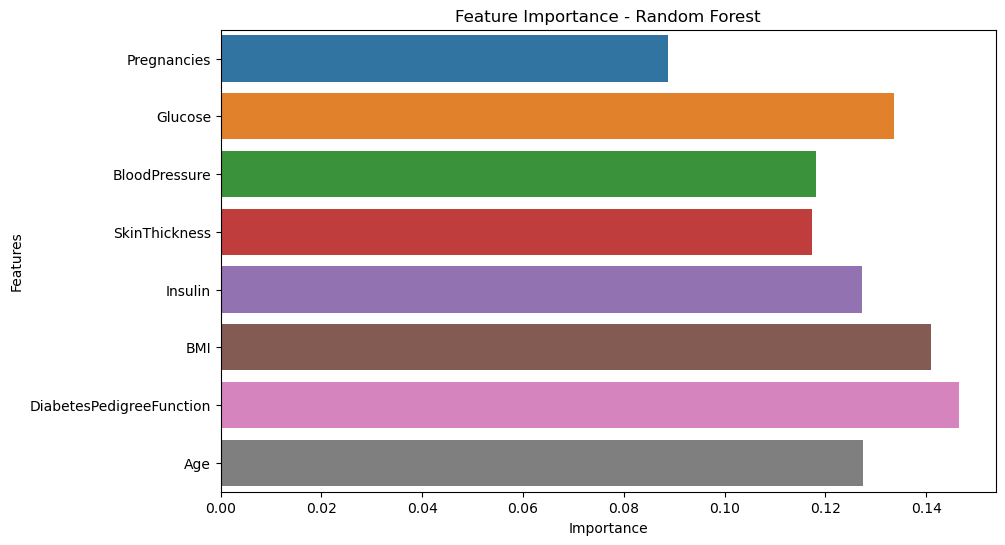

In [85]:
# Feature importance from Random Forest
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X.columns)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [87]:
# Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_y_pred = gb_model.predict(X_test_scaled)

# Evaluate Gradient Boosting
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")
print(classification_report(y_test, gb_y_pred))

Gradient Boosting Accuracy: 0.47
              precision    recall  f1-score   support

           0       0.42      0.48      0.45        69
           1       0.53      0.47      0.50        85

    accuracy                           0.47       154
   macro avg       0.47      0.47      0.47       154
weighted avg       0.48      0.47      0.48       154

